## DPEE 1072
### Boost in Critical Conduction Mode  ( Boudary Conduction Mode )
#### Prof. Humberto Pinheiro,Ph.D.

In [1]:
import numpy as np
from numpy import pi
from scipy import sqrt, exp, cos, matrix, vstack, hstack, zeros
from scipy.linalg import block_diag
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import mpld3
import math as m
import cmath
import sympy as sp
sp.init_printing()

In [2]:
Prated=200
E1=200
E2=400   
fsw_min=50*10**3
Tmax=1/fsw_min
print ( ' fsw at the nominal operation =', fsw_min/1000,'kHz')
print ( ' Tmax=', Tmax*10**6,'us')

 fsw at the nominal operation = 50.0 kHz
 Tmax= 20.0 us


In BCM usually the switching frequency is variable and the control variable is the time duration of the on state of the MOSFET, $ t_ {on} $. The event that defines the transition of the MOSFET to the on state is the diode current crossing zero. 

Text(0.5,1,'MOSFET gate source voltage')

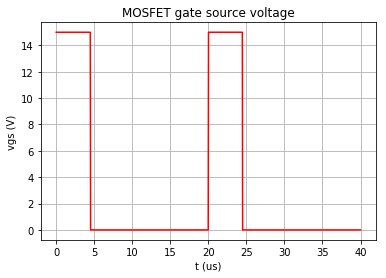

In [3]:
ton=4.5*10**-6
t1=np.linspace(0,2*Tmax,1000)
ts1=t1<ton
ts2=(t1>=ton)*(t1<Tmax)
ts3=(t1>Tmax)*(t1<(ton+Tmax))
ts4=(t1>Tmax)*(t1>(ton+Tmax))
vag=1*ts1+0*ts2+1*ts3+0*ts4
mpld3.enable_notebook()
plt.grid()
plt.plot(t1*10**6,15*vag,'r')
plt.xlabel('t (us)')
plt.ylabel('vgs (V)' )
plt.title('MOSFET gate source voltage')

The voltage $v_{gs}$ looks like the one for DCM or CCM but, as mentioned, its transition from $0$ to $15 V$ is defined by diode current crossing zero, as depicted in the figure below.



![Boost in BCM](img/BOOST_BCM_00.png)

The boost converter operating in BCM has two stages that are described below.

Note that in BCM $i_L(0)=0$.

## Stage 1
This stage is lasts for $ 0<t < t_{on}$, and the equivalente circuit is:
![Boost in BCM](img/Boot_DCM_Stage1.png)

In this stage $ v_{gs}=15V$ and the MOSFET is on.
From the KVL one has:

${v_L} = L\frac{{di_L}}{{dt}} = {E_1}$           

since

${i_L}(0) = 0 $ 

By solving the diferential equation results:


${i_L}(t) = \frac{E_1}{L}t{\rm{ }}$

for any $0 \le t \le t_{on}$.

At the end of this stage, when $t=t_{on}$ ,the inductor current is at its peak, that is:

${i_L}(t_{on}) =  \frac{{{E_1}}}{L}t_{on}{\rm{ }}$ .

Let us name the peak value of the inductor current as $I_{peak}$, therefore

${i_L}(t_{ton})={I_{peak}} =  \frac{{{E_1}}}{L}t_{on}{\rm{ }}$ .


In addtion, the voltage across the diode in this stage is:

$v_{ak}=-E_2$.









## Stage 2
This stage lasts for $ t_{on}<t < T$, and the equivalente circuit is:
![Boost in DCM](img/boost_dcm_stage2.png)

Note that in DCM $i_L(t_{on})=I_{peak}$.

In this stage $ v_{gs}=0V$ and the MOSFET is off.
From the KVL one has:

${v_L} = L\frac{{di_L}}{{dt}} = {E_1}-E_2$ ,          

since $i_L(t_{on})=I_{peak}$,by soving the diferential equation results:


${i_L}(t) = I_{peak}+\frac{E_1-E_2}{L}(t-t_{on}){\rm{ }}$

for any $t_{on} \le t \le T$. 

Now, to find the instant that the diode current reaches zero it is possible to solve the following equation for $t=T$


$0 = {\left. {{I_{peak}} + \frac{{{E_1} - {E_2}}}{L}(t-t_{on})} \right|_{t = {T}}}$

that is 

$T = \frac{{{I_{peak}}L}}{{{E_2} - {E_1}}} + t_{on}$

or

${T} = \frac{{\frac{{{E_1}t_{on}}}{L}}L}{{{E_2} - {E_1}}} + t_{on} = (\frac{{{E_1}}}{{{E_2} - {E_1}}} + 1)t_{on} = \frac{{{E_2}t_{on}}}{{{E_2} - {E_1}}}$

Again,in BCM the current $i_L$  reaches zero at end of the cycle, that is when $t=T$.

Finally, the voltage across the MOSFET is

$ v_{DS}=E_2$.



# Design 

Let us start by defining the current through the inductor

${i_L}(t) = \left\{ {\begin{array}{*{20}{c}}
{\frac{{{E_1}}}{L}t}&\forall &{0 < t \le {t_{on}}}\\
{{I_{peak}} + \frac{{{E_1} - {E_2}}}{L}(t - {t_{on}})}&\forall &{{t_{on}} < t \le T}
\end{array}} \right.$

where

${I_{peak}} = \frac{{{E_1}t_{on}}}{L}$,



therefore, the average boost inductor current computed over of cycle,that is over a time interval equal to $T$ is:

${I_{L\_av}} = \frac{1}{T}\int_0^T {{i_L}(t)dt}$

${I_{L\_av}} = \frac{{{E_1}t_{on}}}{2L}$

which leads to

$L = \frac{{{E_1}t_{on}}}{2LI_{Lav}}$.

For the design we can replace 

$I_{Lav}=\frac{P_{rated}}{E_1}$ 

and 

${t_{on}} = \frac{{({E_2} - {E_1}){T_{\max }}}}{{{E_2}}} = \frac{{{E_2} - {E_1}}}{{{E_2}{f_{sw\_\min }}}}$

which results

$L = \frac{{{E_1}^2({E_2} - {E_1})}}{{2{E_2}{P_{rated}}{f_{sw\_\min }}}}$

## Example

In [4]:
print('E1=',E1, 'V')
print('E2=',E2,'V')
print('Prated=',Prated,'W')
print ( 'fsw at the nominal operation =', fsw_min/1000,'kHz')
print ( 'Tmax=', Tmax*10**6,'us')


E1= 200 V
E2= 400 V
Prated= 200 W
fsw at the nominal operation = 50.0 kHz
Tmax= 20.0 us


 ## Inductance value

In [5]:
L=E1**2*(E2-E1)/(2*E2*Prated*fsw_min)
print( 'L=',L*10**6,'uH')

L= 1000.0 uH


## RMS  and average current through the MOSFET.  

Let us start from the MOSFET current as a function of time

${i_{MOSFET}}(t) = \left\{ {\begin{array}{*{20}{c}}
{\frac{{{E_1}}}{L}t}&\forall &{0 < t \le t_{on}}\\
0&\forall &{t_{on} < t \le T}
\end{array}} \right.$  .

The MOSFET rms current is:

${I_{MOSFET\_rms}} = \sqrt {\frac{1}{T}\int_0^T {{i_{MOSFET}}{{(t)}^2}dt} }  $

In [6]:
ton=(E2-E1)/(E2*fsw_min)
t=sp.symbols('t')
Irms=sp.sqrt(1/Tmax*sp.integrate( (E1*t/L)**2,(t,0,ton)))
print('Irms_MOSFET=',Irms,'A')
print('ton=',ton*10**6,'us')

Irms_MOSFET= 0.816496580927726 A
ton= 10.0 us


 ## RMS and average and current through the diode

${i_{DIDO}}(t) = \left\{ {\begin{array}{*{20}{c}}
0&\forall &{0 < t \le {t_{on}}}\\
{{I_{peak}} + \frac{{{E_1} - {E_2}}}{L}(t - {t_{on}})}&\forall &{{t_{on}} < t \le T}
\end{array}} \right.$


$\begin{array}{l}
{I_{DIODE\_rms}} = \sqrt {\frac{1}{T}\int_0^T {{i_{DIODE}}{{(t)}^2}dt} } \\
\\
{I_{DIODE\_av}} = \frac{1}{T}\int_0^T {{i_{DIODE}}(t)dt} 
\end{array}$

In [7]:
Ipeak=E1*ton/L
print('Ipeak=',Ipeak,'A')
t=sp.symbols('t')
Irms_diode=sp.sqrt( 1/Tmax*sp.integrate( (Ipeak+(E1-E2)/L*(t-ton))**2,(t,ton,Tmax) ) )
print('Irms_diode=',Irms_diode,'A')
Iav_diode=1/Tmax*sp.integrate( (Ipeak+(E1-E2)*(t-ton)/L),(t,ton,Tmax))
print('Iav_diode=',Iav_diode,'A')

Ipeak= 2.0 A
Irms_diode= 0.816496580927726 A
Iav_diode= 0.500000000000000 A


##  Quantities for the inductor design
${i_L}(t) = \left\{ {\begin{array}{*{20}{c}}
{\frac{{{E_1}}}{L}t}&\forall &{0 < t \le {t_{on}}}\\
{{I_{peak}} + \frac{{{E_1} - {E_2}}}{L}(t - dT)}&\forall &{{t_{on}} < t \le T}
\end{array}} \right.$

Therefore the peak value of the inductor current is:

${I_{Lpeak}} = \frac{{{E_1}t_{on}}}{L}$

The RMS value of the inductor current is:

In [8]:
print('ton=',ton*10**6,'us')
iL1=(E1*t/L)
iL2=Ipeak+(E1-E2)/L*(t-ton)
Irms_inductor=sp.sqrt(1/Tmax*(sp.integrate(iL1**2,(t,0,ton))+sp.integrate(iL2**2,(t,ton,Tmax))))
print('RMS value of the inductor current =',Irms_inductor,'A')
print('Peak value of the inductor current =',Ipeak,'A')

ton= 10.0 us
RMS value of the inductor current = 1.15470053837925 A
Peak value of the inductor current = 2.0 A


### Other operating points
${f_{sw }} = \frac{{{E_1}^2({E_2} - {E_1})}}{{2{E_2}{P_{}}L}}$

Text(0.5,1,'Switching Frequency as function of the Power')

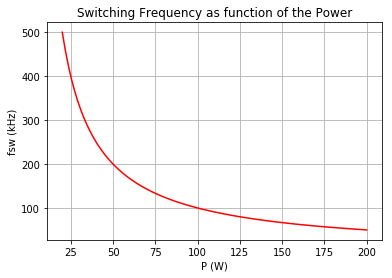

In [9]:
P=np.linspace(0.1*Prated,Prated,100)
fsw=E1**2*(E2-E1)/(2*E2*P*L)
ton=(E2-E1)/(E2*fsw)
mpld3.enable_notebook()
plt.grid()
plt.plot(P,fsw/1000,'r')
plt.xlabel('P (W)')
plt.ylabel('fsw (kHz)' )
plt.title('Switching Frequency as function of the Power')




Text(0.5,1,'ton as function of the Power')

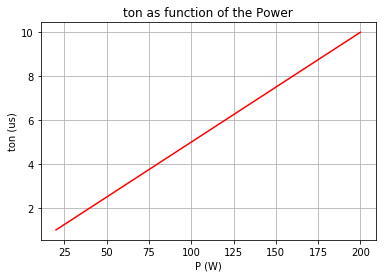

In [10]:
mpld3.enable_notebook()
plt.grid()
plt.plot(P,ton*10**6,'r')
plt.xlabel('P (W)')
plt.ylabel('ton (us)' )
plt.title('ton as function of the Power')

### Power Factor Correction 
####  Boost PFC in BCM


![Boost in PFC](img/BOOST_PFC_Critical.png)

Fig. Boost PFC, source [1].

Text(0.5,1,'E1 obtained from a the rectification of as ac voltage')

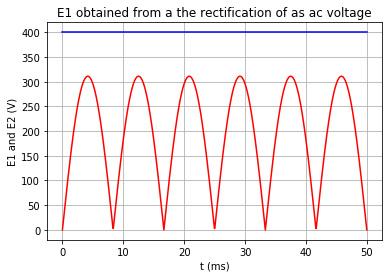

In [11]:
t=np.linspace(0,0.05,1000)
w=2*pi*60
Vgrid=311*np.sin(w*t)
E1=np.abs(Vgrid)
E2=400*(1+t*0)
mpld3.enable_notebook()
plt.grid()
plt.plot(t*10**3,E1,'r')
plt.plot(t*10**3,E2,'b')
plt.ylabel('E1 and E2 (V)')
plt.xlabel('t (ms)' )
plt.title('E1 obtained from a the rectification of as ac voltage')

Text(0.5,1,'Rectifier dc side average current')

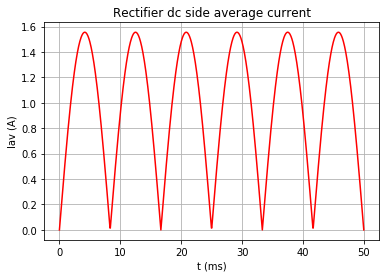

In [12]:
ton=10*10**-6
Iav=E1*ton/L/2
mpld3.enable_notebook()
plt.grid()
plt.plot(t*10**3,Iav,'r')
plt.ylabel('Iav (A)')
plt.xlabel('t (ms)' )
plt.title('Rectifier dc side average current')

Text(0.5,1,'Rectifier dc side Power')

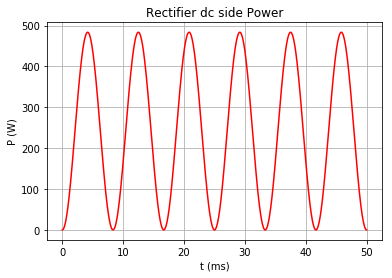

In [13]:
ton=10*10**-6
Pav=Iav*E1
mpld3.enable_notebook()
plt.grid()
plt.plot(t*10**3,Pav,'r')
plt.ylabel('P (W)')
plt.xlabel('t (ms)' )
plt.title('Rectifier dc side Power')

The current the grid side will be

In [14]:
Igrid=Pav/Vgrid

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Rectifier ac side current')

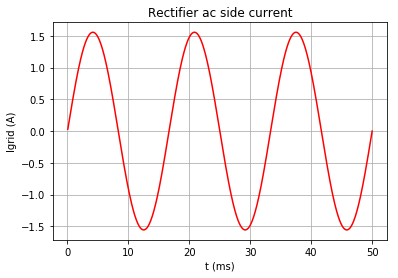

In [15]:
mpld3.enable_notebook()
plt.grid()
plt.plot(t*10**3,Igrid,'r')
plt.ylabel('Igrid (A)')
plt.xlabel('t (ms)' )
plt.title('Rectifier ac side current')

### The frequency along the grid voltage fundamental cycle

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


Text(0.5,1,'Boost switching frequency along the input ac voltage cycle')

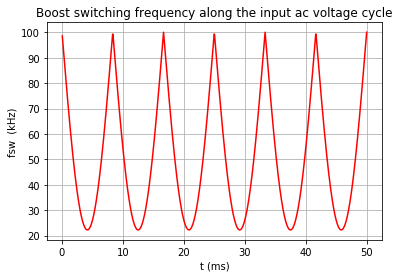

In [16]:
t=np.linspace(0,0.05,1000)
w=2*pi*60
Vgrid=311*np.sin(w*t)
E1=np.abs(Vgrid)
E2=400*(1+t*0)
fsw=E1**2*(E2-E1)/(2*E2*Pav*L)

mpld3.enable_notebook()
plt.grid()
plt.plot(t*10**3,fsw/1000,'r')
plt.ylabel('fsw  (kHz)')
plt.xlabel('t (ms)' )
plt.title('Boost switching frequency along the input ac voltage cycle')

## Design 

Input Parameters

Average Power Drawn from the grid

In [17]:
Pav=500 

Peak power drawn from the grid

In [18]:
Peak=2*Pav

Peak value value of the  grid input voltage 

In [19]:
E1=np.sqrt(2)*220
print('Peak value of the input voltage E1=',E1,'V')

Peak value of the input voltage E1= 311.1269837220809 V


Output Voltage

In [20]:
E2=400

Minimum switching frequency

In [21]:
fsw_min=30000
print('Minimum switching frequency fsw_min=',fsw_min/1000,'kHz')

Minimum switching frequency fsw_min= 30.0 kHz


#### Inductance to ensure the minimum switching frequency

In [22]:
L=E1**2*(E2-E1)/(2*E2*Peak*fsw_min)
ton=(E2-E1)/(E2*fsw_min)
print( 'L=',L*10**6,'uH')
print( 'ton=',ton*10**6,'uH')

L= 358.45449898760694 uH
ton= 7.4060846898265895 uH


#### Output Capacitance
The 120Hz ac current component through the capacitor due the pulsating nature of the power drawn from the grid is

In [23]:
Icap_120_peak=Pav/E2;
print( 'Iac_120_peak=',Icap_120_peak,'A')

Iac_120_peak= 1.25 A


The resulting ac voltage is 
$${V_{ac\_120}} = {I_{ac\_120}}\frac{1}{{2\pi 120C}}$$

$$C > {I_{ac\_120}}\frac{1}{{2\pi 120Rippl{e_{120}}{E_2}}}$$

In [24]:
Ripple_120=0.025
Vac_120=Ripple_120*E2
C=Icap_120_peak/(2*np.pi*120*Ripple_120*E2)
R=E2**2/Pav
print('Output Capacitance C=',C*10**6,'uF')
print('R=',R,'ohms')
print('Vac_120=',Vac_120,'V peak')

Output Capacitance C= 165.78639905405765 uF
R= 320.0 ohms
Vac_120= 10.0 V peak


## References

[1] AN-8035 Design Consideration for Boundary Conduction Mode
Power Factor Correction (PFC) Using FAN7930.  Accessed on https://www.onsemi.com/pub/Collateral/AN-8035.pdf.pdf

[2] K. Yao, Y. Wang, J. Guo and K. Chen, "Critical Conduction Mode Boost PFC Converter With Fixed Switching Frequency Control," in IEEE Transactions on Power Electronics, vol. 33, no. 8, pp. 6845-6857, Aug. 2018.

[3]C. Hung and Y. Tzou, "MathCAD design of critical conduction mode PFC converters," 2009 IEEE 6th International Power Electronics and Motion Control Conference, Wuhan, 2009, pp. 1684-1688.

[4] FAN7529 Critical Conduction Mode PFC Controller PFC Controller. Accessed on https://www.mouser.com/datasheet/2/149/FAN7529-1006915.pdf

[5] AN-1043 Stabilize the Buck Converter with Transconductance Amplifier https://www.infineon.com/dgdl/an-1043.pdf?fileId=5546d462533600a40153559189a30f92


